In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df=pd.read_csv("Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
label_encoder=preprocessing.LabelEncoder()

In [5]:
df1=df
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
df1['Undergrad']=label_encoder.fit_transform(df1['Undergrad'])
df1['Marital.Status']=label_encoder.fit_transform(df1['Marital.Status'])
df1['Urban']=label_encoder.fit_transform(df1['Urban'])

In [7]:
df1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [8]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
df1["TaxInc"] = pd.cut(df1["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [9]:
df1.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good
599,0,0,96519,158137,16,0,Good


In [10]:
df1['TaxInc']=label_encoder.fit_transform(df1['TaxInc'])
df1.head(20)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
5,0,0,33329,116382,0,0,0
6,0,0,83357,80890,8,1,0
7,1,2,62774,131253,3,1,0
8,0,2,83519,102481,12,1,0
9,1,0,98152,155482,4,1,0


In [25]:
# Declaring features & target
X = df1.drop(['TaxInc','Taxable.Income'], axis=1)
y = df1['TaxInc']
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: TaxInc, Length: 600, dtype: int32

In [26]:
# Splitting data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Building Decision Tree Classifier using Entropy Criteria# 

In [27]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [28]:
colname=list(df1.columns)
colname

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban',
 'TaxInc']

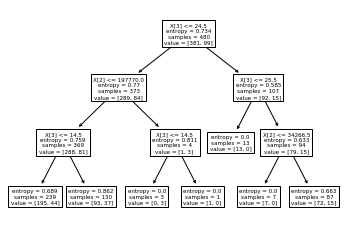

In [29]:
#PLot the decision tree
tree.plot_tree(model);

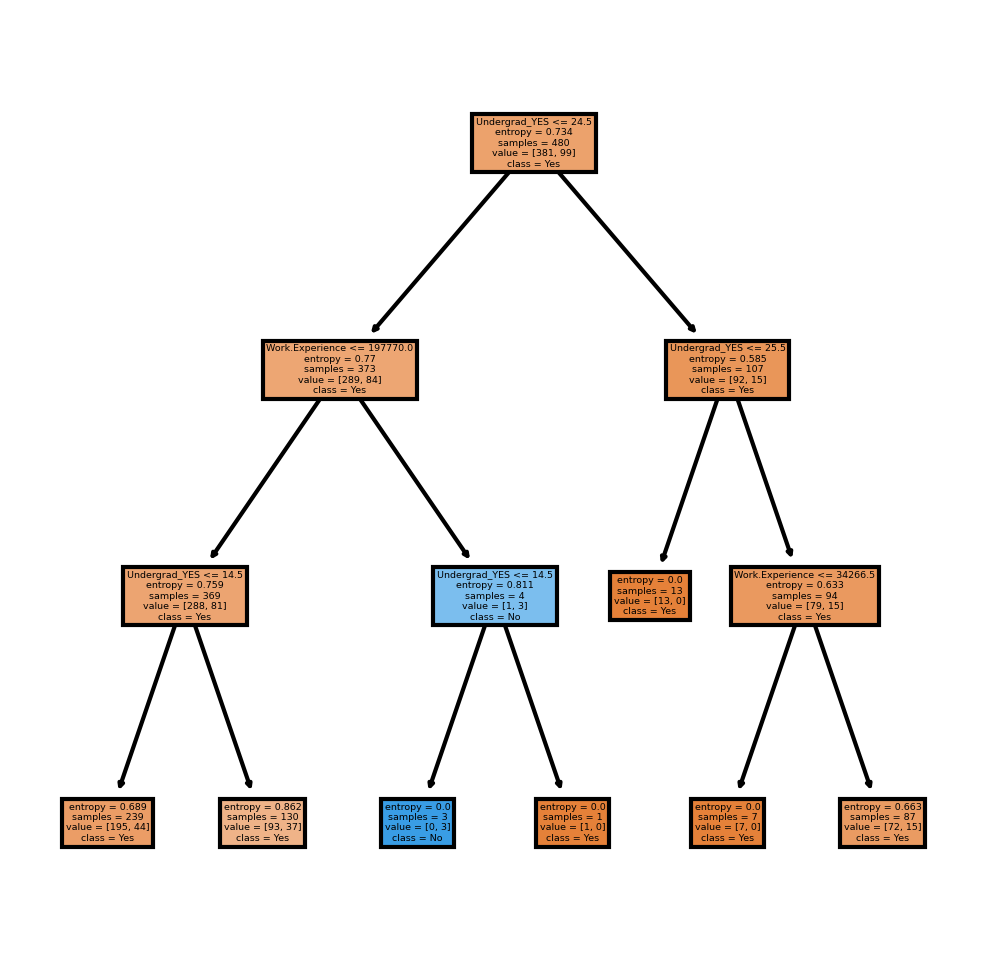

In [30]:
fn=['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']
cn=['Yes','No']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [33]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    119
1      1
dtype: int64

In [34]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
TaxInc,,
0,94,1
1,25,0


In [36]:
# Accuracy 
np.mean(preds==y_test)

0.7833333333333333

### Building Decision Tree Classifier (CART) using Gini Criteria

In [37]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [38]:
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [39]:
#Prediction and computing the accuracy
pred=model.predict(X_test)
np.mean(preds==y_test)

0.7833333333333333

In [40]:
print('Train accuracy: {}'.format(model.score(X_train, y_train)))
print('Test accuracy: {}'.format(model.score(X_test, y_test)))

Train accuracy: 0.8
Test accuracy: 0.7833333333333333


In [44]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[94  1]
 [25  0]]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88        95
           1       0.00      0.00      0.00        25

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.63      0.78      0.70       120

